In [1]:
# %reset
# import sys
# sys.path.append( '../../python_wb/Stocks')
# from nsefolder2pickle import NseFolder2Pickle; 
import numpy as np
import pandas as pd

# from nse_pickle_fns import *
import os
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

# from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
def get_log_traintest():
    COLUMNS = ["DEPTH","DT","GR","LLD","LLS","PHIE","PHIT","RHOB","SW","TNPH","VWCL"]
    FEATURES = ["DEPTH","DT","GR","LLD","LLS","RHOB","TNPH"]
    LABELS = ["phit","phie","sw"]
    LABEL = "phit"
    COLUMNS=[c.lower() for c in COLUMNS]
    FEATURES=[c.lower() for c in FEATURES]
    # COLUMNS
    from sklearn import model_selection
    from sklearn.preprocessing import StandardScaler
    # folder=r'D:\Ameyem Office\Geoservices\Neeraj & me\log data\\'
    # df=pd.read_csv('lasdata.csv')
    # df=pd.read_csv('lasdata.csv',skipinitialspace=True, \
    #                          skiprows=1, names=COLUMNS)

    folder="D:\SoftwareWebApps\Python\GeoProjects\AI&ML\\"
    training_set = pd.read_csv(folder+"lasdata.csv", skipinitialspace=True,
                             skiprows=1, names=COLUMNS)
    prediction_set = pd.read_csv(folder+"lasdata-predict.csv",skipinitialspace=True, \
                             skiprows=1, names=COLUMNS)
    # prediction_set
    # df.head()
    scaler_x = StandardScaler()
    scaler_x.fit(training_set[FEATURES].values)

    scaler_y = StandardScaler()
    scaler_y.fit(prediction_set[LABEL].values.reshape(-1, 1))

    # pd.DataFrame(scaler_x.transform(target_df.values),columns=target_df.columns)
    
#     x_train=scaler_x.transform(training_set[FEATURES].values).astype('float32')
#     y_train=scaler_y.transform(training_set[LABEL].values.reshape(-1, 1)).astype('float32')

#     x_test= scaler_x.transform(prediction_set[FEATURES].values).astype('float32')
#     y_test=scaler_y.transform(prediction_set[LABEL].values.reshape(-1, 1)).astype('float32')
    
    x_train=training_set[FEATURES].values.astype('float32')
    y_train=training_set[LABEL].values.reshape(-1, 1)

    x_test= prediction_set[FEATURES].values.astype('float32')
    y_test=prediction_set[LABEL].values.reshape(-1, 1)

    return x_train, x_test, y_train, y_test, scaler_x, scaler_y
# prediction_set[LABEL].values,Y_train.reshape(1,-1 )


In [3]:
# x_train, x_test, y_train, y_test, scaler_x, scaler_y = get_log_traintest()
# x_train.shape,x_train



In [4]:
max_features = 15000
maxlen = 7  # cut texts after this number of words (among top max_features most c ommon words)
batch_size = 32
x_train, x_test, y_train, y_test, scaler_x, scaler_y = get_log_traintest()
print('x_train shape:', x_train.shape)

print('x_test shape:', x_test.shape)
# x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
# x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
x_train

x_train shape: (14853, 7)
x_test shape: (1887, 7)
x_train shape: (14853, 7)
x_test shape: (1887, 7)


array([[1.3191744e+03, 1.3061670e+02, 6.3421501e+01, ..., 6.2971001e+00,
        2.0867000e+00, 5.0940001e-01],
       [1.3193268e+03, 1.2444480e+02, 6.8975998e+01, ..., 6.3670001e+00,
        2.1098001e+00, 4.7000000e-01],
       [1.3194792e+03, 1.1972090e+02, 7.2372101e+01, ..., 6.3894000e+00,
        2.1375000e+00, 4.4769999e-01],
       ...,
       [2.1498999e+03, 1.0556910e+02, 7.1980003e+01, ..., 5.8499999e+00,
        2.2800000e+00, 6.4780003e-01],
       [2.1500000e+03, 1.0585000e+02, 7.4199997e+01, ..., 5.9499998e+00,
        2.2700000e+00, 6.8080002e-01],
       [2.1501001e+03, 1.0657000e+02, 7.3440002e+01, ..., 6.0300002e+00,
        2.2700000e+00, 6.5930003e-01]], dtype=float32)

In [15]:
# x_train.shape[1]
# look_back


In [21]:
# x_train, x_test, y_train, y_test, scaler_x, scaler_y = get_log_traintest()
# x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
# x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
# x_train[1:20,:]
print('Build model...')


# model = Sequential()
# model.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.3))
# # model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))

# # try using different optimizers and different optimizer configs
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])


# look_back=x_train.shape[1]
# model = Sequential()
# model.add(Embedding(max_features, 512))
# model.add(LSTM(512,dropout=0.2, recurrent_dropout=0.3))

# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

print('Train...')

model.fit(x_train, y_train,
          epochs=10, batch_size=batch_size, verbose=2)

# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=15,
#           validation_data=(x_test, y_test))
# score, acc = model.evaluate(x_test, y_test,
#                             batch_size=batch_size)
# print('Test score:', score)
# print('Test accuracy:', acc)
y_pred=model.predict(x_test)
# y_test=scaler_y.inverse_transform(y_test)
# y_pred=scaler_y.inverse_transform(y_pred)
# ypred =(y_pred>np.median(y_pred))+0.0
# print(confusion_matrix(y_test,ypred))
# print(classification_report(y_test,ypred))
# # return classification_report(y_test,ypred)

Build model...
Train...
Epoch 1/10
 - 50s - loss: 4.2428e-05
Epoch 2/10
 - 49s - loss: 4.4852e-05
Epoch 3/10
 - 54s - loss: 4.3318e-05
Epoch 4/10
 - 50s - loss: 4.6416e-05
Epoch 5/10
 - 50s - loss: 5.2820e-05
Epoch 6/10
 - 49s - loss: 4.1758e-05
Epoch 7/10
 - 49s - loss: 4.1177e-05
Epoch 8/10
 - 50s - loss: 4.0056e-05
Epoch 9/10
 - 50s - loss: 4.0266e-05
Epoch 10/10
 - 49s - loss: 3.9269e-05


In [18]:
# y_pred=model.predict(x_test)
# y_pred
# y_pred=model.predict(x_test)

# import pickle
# pickle.dump(model, open('lstm_model_512cells_100epoch.pkl', 'wb'))
from keras.models import load_model

model.save('lstm_model_512cells_100epoch.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('lstm_model_512cells_100epoch.h5')

In [19]:
# save as JSON
json_string = model.to_json()

# save as YAML
yaml_string = model.to_yaml()
json_string

'{"class_name": "Sequential", "config": [{"class_name": "Embedding", "config": {"name": "embedding_5", "trainable": true, "batch_input_shape": [null, null], "dtype": "float32", "input_dim": 15000, "output_dim": 512, "embeddings_initializer": {"class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": null}}, {"class_name": "LSTM", "config": {"name": "lstm_5", "trainable": true, "return_sequences": false, "return_state": false, "go_backwards": false, "stateful": false, "unroll": false, "units": 512, "activation": "tanh", "recurrent_activation": "hard_sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "recurrent_initializer": {"class_name": "Orthogonal", "config": {"gain": 1.0, "seed": null}}, "bias_initializer"

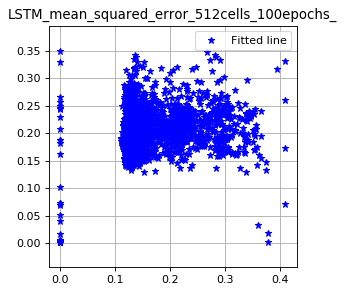

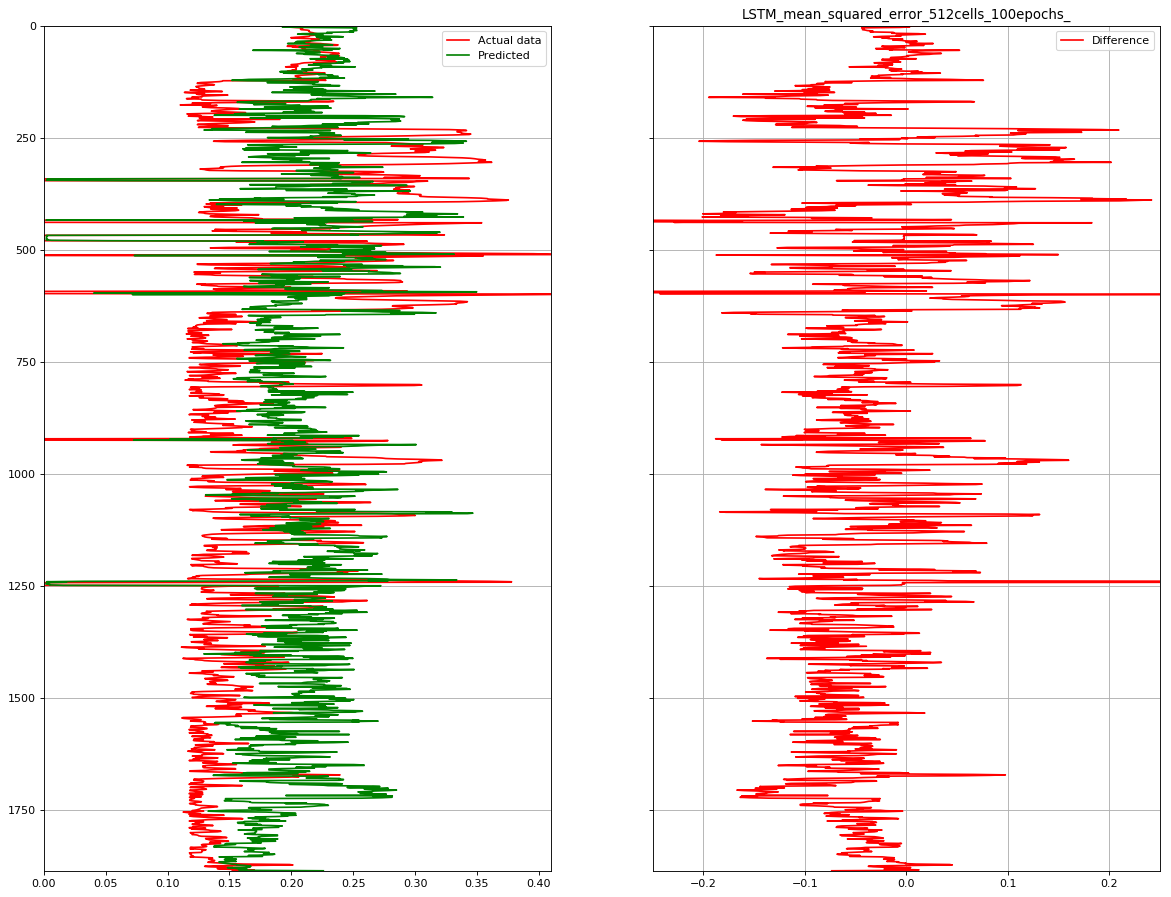

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
imname='LSTM_mean_squared_error_512cells_100epochs_'
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi= 80, sharey=True)
# with ax_ as ax1:
ax1.plot(y_test, y_pred,'b*', label='Fitted line')
ax1.legend()
ax1.axis('equal')
ax1.grid(True)
plt.title(imname)
plt.show() #5000 epochs, 1024

fig1.savefig(imname+'_scatter.png', dpi=100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
i=0
perc_diff=(-y_pred+y_test)
for axes in ax:
    if(i==0):
        axes.plot( y_test,range(len(y_test)), label="Actual data",color='red')
        axes.plot( y_pred,range(len(y_pred)), label="Predicted",color='green')
        axes.set_xlim (min(y_test),max(y_test))
    else:
        axes.plot(perc_diff  ,range(len(perc_diff)), label="Difference",color='red')
        axes.set_xlim (-.25,+.25)
        axes.xaxis.grid(True)
#         axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
    i+=1
    axes.set_ylim (0,len(y_test))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
plt.title(imname)
plt.show()  #5000 epochs, 1024
fig.savefig(imname+'_log.png', dpi=100)

In [ ]:
def run_LSTM():
    max_features = 20000
    maxlen = 80  # cut texts after this number of words (among top max_features most c ommon words)
    batch_size = 32
#     df=pd.DataFrame(stock_data)
#     X=df[df.columns[1:-1]].drop(['ntrades','volume'], axis = 1).values
#     y=df['result'].values

    x_train, x_test, y_train, y_test, scaler_x, scaler_y = get_log_traintest()
    x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
    x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)

    print('Build model...')
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.3))
    model.add(Dense(1, activation='sigmoid'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    print('Train...')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))
    score, acc = model.evaluate(x_test, y_test,
                                batch_size=batch_size)
    print('Test score:', score)
    print('Test accuracy:', acc)
    y_pred=model.predict(x_test)
    ypred =(y_pred>np.median(y_pred))+0.0
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    return classification_report(y_test,ypred)